## Dependencies

In [ ]:
%pwd

In [ ]:
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
from torch.utils.data import DataLoader
from src.dataloader import EchoMaskDataset, build_polygons_dict
from src.model3 import MobileNetV3UNet
import torch
from src.train import train_UNet
import gc
from src.utils import plot_loss_curves


## Global parameters
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
batch_size = 16
lr = 1e-3
num_epochs = 500

# -- Change this as per your data directory --#
data_path = Path('C:\Projects\python\echoframe\data\EchoNet-Dynamic\EchoNet-Dynamic\\')


file_list_path = os.path.join(data_path,'FileList.csv')
model_path_3 = Path('./models/model3/best_model1.pt')
os.makedirs('./models/model3',exist_ok=True)
log_path_3 = Path('./logs/train_log_mobilenet_1.csv')
os.makedirs('./logs',exist_ok=True)
volume_tracings_path = os.path.join(data_path,'VolumeTracings.csv')
videos_path = os.path.join(data_path,'Videos')
polygons_dict = build_polygons_dict(volume_tracings_path)

<>:25: SyntaxWarning: invalid escape sequence '\P'
<>:25: SyntaxWarning: invalid escape sequence '\P'
C:\Users\harsh\AppData\Local\Temp\ipykernel_1508\1229877162.py:25: SyntaxWarning: invalid escape sequence '\P'
  data_path = Path('C:\Projects\python\echoframe\data\EchoNet-Dynamic\EchoNet-Dynamic\\')


## Load Data

In [8]:
file_list = pd.read_csv(filepath_or_buffer=file_list_path)
volume_tracings = pd.read_csv(filepath_or_buffer=volume_tracings_path)


file_list['FileName'] = file_list['FileName'].apply(
    lambda x: x if x.endswith('.avi') else x + '.avi'
)
vt_filenames = set(volume_tracings['FileName'])
fl_filenames = set(file_list['FileName'])

missing_files = list(fl_filenames - vt_filenames)
extra_files = list(vt_filenames - fl_filenames)

print(f'Missing files: \n{missing_files}\n\nExtra files: \n{extra_files}')
redacted_files = missing_files+extra_files

file_list = file_list[~file_list['FileName'].isin(redacted_files)]
volume_tracings = volume_tracings[~volume_tracings['FileName'].isin(redacted_files)]

train_df = file_list[file_list['Split'] == 'TRAIN']
val_df   = file_list[file_list['Split'] == 'VAL']
test_df  = file_list[file_list['Split'] == 'TEST']

Missing files: 
['0X234005774F4CB5CD.avi', '0X2DC68261CBCC04AE.avi', '0X6C435C1B417FDE8A.avi', '0X35291BE9AB90FB89.avi', '0X5DD5283AC43CCDD1.avi', '0X5515B0BD077BE68A.avi']

Extra files: 
['0X4F8859C8AB4DA9CB.avi']


In [10]:
train_dataset = EchoMaskDataset(
    df=train_df,
    polygons_dict=polygons_dict,
    videos_path=videos_path,
    transform=None,         # or pass a custom transform
    resize=(112, 112),
    all_traced_frames=True, # if you want *all* traced frames
    offset_frames_by_one=False
)
val_dataset = EchoMaskDataset(
    df=val_df,
    polygons_dict=polygons_dict,
    videos_path=videos_path,
    transform=None,         # or pass a custom transform
    resize=(112, 112),
    all_traced_frames=True, # if you want *all* traced frames
    offset_frames_by_one=False
)

# Wrap in DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=16)


## Model Training

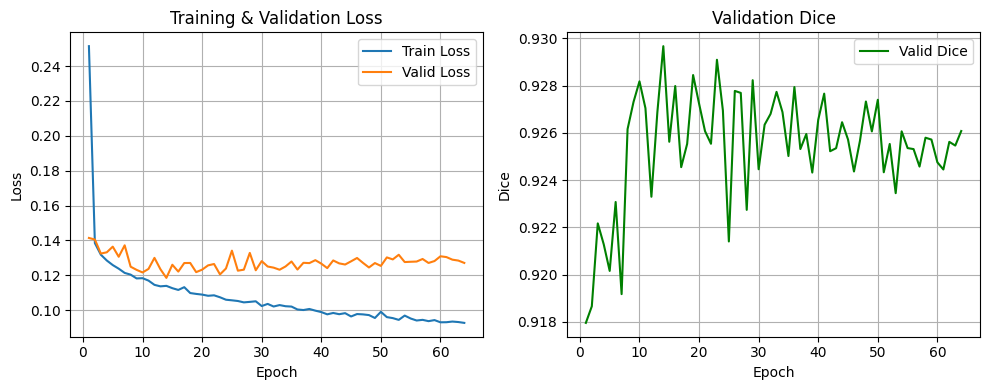

In [11]:
# model_3 = MobileNetV3UNet()
# train_UNet(model=model_3,
#            train_loader=train_loader,
#            valid_loader=val_loader,
#            device=device,
#            num_epochs=num_epochs,
#            lr=lr,
#            log_path=log_path_3,
#            model_path=model_path_3)
# del model_3
# torch.cuda.empty_cache()
# gc.collect()

plot_loss_curves(log_path=log_path_3)

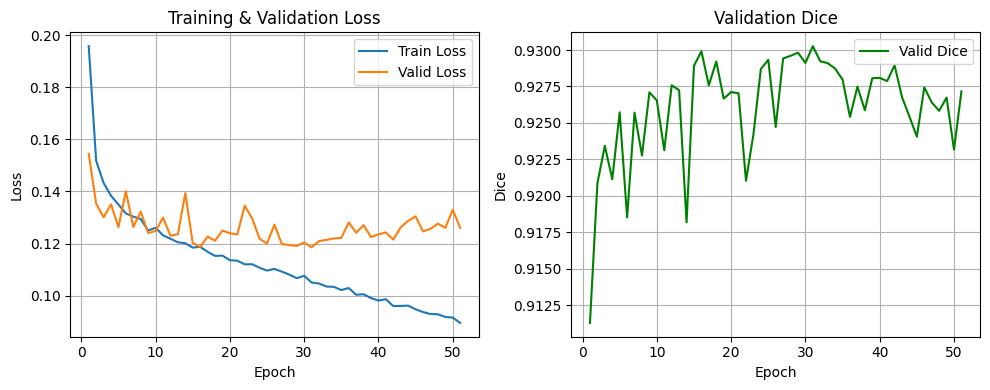

In [12]:
# from src.model1 import UNet
log_path_1 = Path('./logs/train_log_unet_1.csv')
# os.makedirs('./models/model1',exist_ok=True)
# model_path_1 = Path('./models/model1/best_model1.pt')
# model_1 = UNet()
# train_UNet(model=model_1,
#            train_loader=train_loader,
#            valid_loader=val_loader,
#            device=device,
#            num_epochs=num_epochs,
#            lr=lr,
#            log_path=log_path_1,
#            model_path=model_path_1,
#            patience=20)
# del model_1
# torch.cuda.empty_cache()
# gc.collect()

plot_loss_curves(log_path=log_path_1)

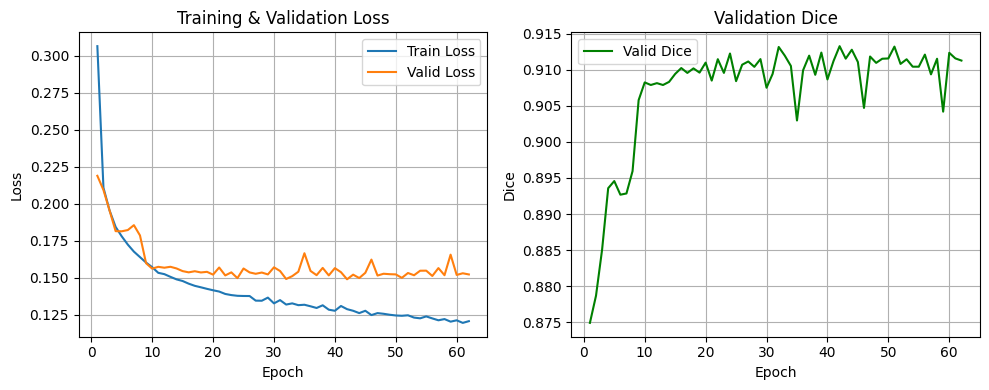

In [13]:
# from src.model6 import PretrainedUNETR
log_path_6 = Path('./logs/train_log_unetr_1.csv')
# os.makedirs('./models/model6',exist_ok=True)
# model_path_6 = Path('./models/model6/best_model1.pt')
# model_6 = PretrainedUNETR(img_size=112)
# train_UNet(model=model_6,
#            train_loader=train_loader,
#            valid_loader=val_loader,
#            device=device,
#            num_epochs=num_epochs,
#            lr=lr,
#            log_path=log_path_6,
#            model_path=model_path_6,
#            patience=20)
# del model_6
# torch.cuda.empty_cache()
# gc.collect()

plot_loss_curves(log_path=log_path_6)